In [13]:
import sys
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming the 'main' directory is one level up from the current working directory
main_dir = os.path.dirname(os.getcwd())
sys.path.append(main_dir)

from preproc.data import clean_data_weather

def scale_weather():
    """
    Loads, processes, and scales weather data.
    Returns: Processed DataFrame with scaled weather data.
    """
    try:
        weather_df = clean_data_weather()
    except Exception as e:
        raise RuntimeError(f"Error loading coal data: {e}")

    # Convert 'Date' to datetime with UTC timezone
    weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc=True)

    # Remove rows where the Date is NaT
    weather_df = weather_df[weather_df['datetime'].notna()]

    # Set 'Date' as the index
    weather_df.set_index('datetime', inplace=True)

    # Remove any potential duplicate indices
    weather_df = weather_df[~weather_df.index.duplicated(keep='first')]

    scaler = MinMaxScaler()

    # Scale 'coal_adj_close' column
    #weather_df['temp_north'] = scaler.fit_transform(weather_df[['temp_north']])

    # Resample the DataFrame to 15-minute intervals, forward-filling the data
    weather_df = weather_df.resample('15T').ffill()

    return weather_df


In [14]:
#weather_data = scale_weather()
weather_df = clean_data_weather()
weather_df.info()


Loaded weather_north_hourly.csv successfully.
Loaded weather_south_hourly.csv successfully.
Loaded weather_brocken_hourly.csv successfully.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51684 entries, 0 to 51683
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                51684 non-null  object 
 1   temp_north              51684 non-null  float64
 2   windspeed_north         51684 non-null  float64
 3   temp_south              51684 non-null  float64
 4   windspeed_south         51684 non-null  float64
 5   solarradiation_south    51684 non-null  float64
 6   solarenergy_south       51684 non-null  float64
 7   temp_brocken            51684 non-null  float64
 8   windspeed_brocken       51684 non-null  float64
 9   solarradiation_brocken  51684 non-null  float64
 10  solarenergy_brocken     51684 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.7+ MB


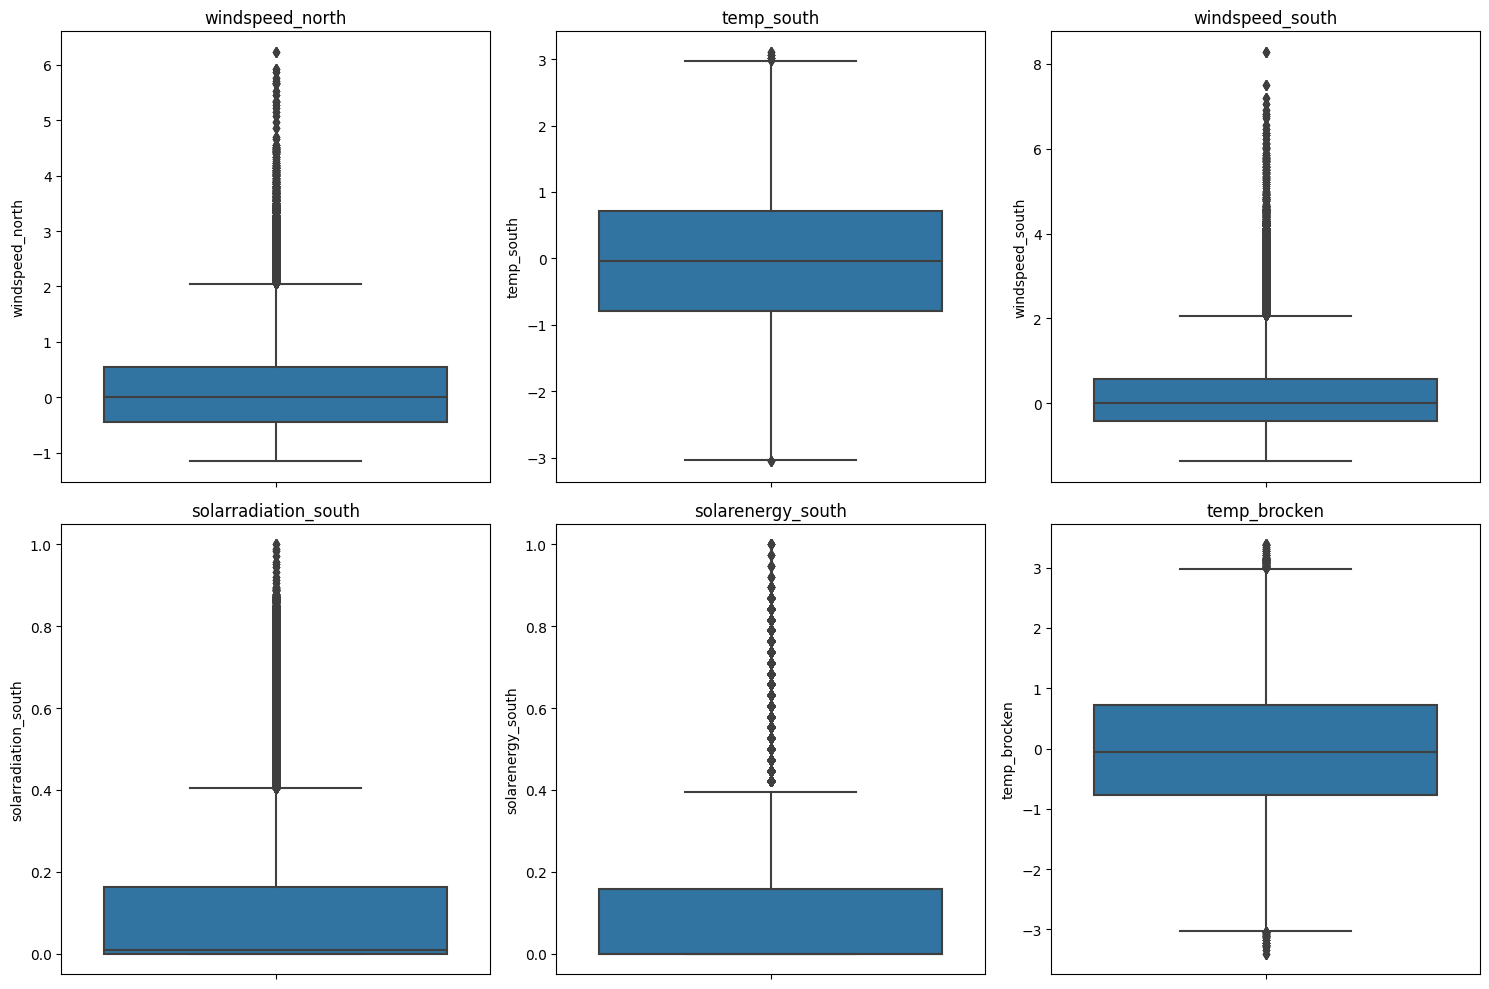

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of a subset of features to check their distribution and presence of outliers
features_to_plot = weather_data.columns[1:7]  # Selecting a subset of columns for clarity in visualization

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=weather_data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [16]:
import sys
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming the 'main' directory is one level up from the current working directory
main_dir = os.path.dirname(os.getcwd())
sys.path.append(main_dir)

from preproc.data import clean_data_weather

def scale_weather():
    """
    Loads, processes, and scales weather data.
    Returns: Processed DataFrame with scaled weather data.
    """
    try:
        weather_df = clean_data_weather()
    except Exception as e:
        raise RuntimeError(f"Error loading coal data: {e}")

    # Convert 'Date' to datetime with UTC timezone
    weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc=True)

    # Remove rows where the Date is NaT
    weather_df = weather_df[weather_df['datetime'].notna()]

    # Set 'Date' as the index
    weather_df.set_index('datetime', inplace=True)

    # Remove any potential duplicate indices
    weather_df = weather_df[~weather_df.index.duplicated(keep='first')]

    #scaler = MinMaxScaler()

    # Creating scalers for different types of features
    scaler_temp = StandardScaler()
    scaler_windspeed = RobustScaler()

    # Columns to be scaled
    temp_columns = ['temp_north', 'temp_south', 'temp_brocken']
    windspeed_columns = ['windspeed_north', 'windspeed_south', 'windspeed_brocken']

    # Applying StandardScaler to temperature features
    weather_df[temp_columns] = scaler_temp.fit_transform(weather_df[temp_columns])

    # Applying RobustScaler to windspeed features
    weather_df[windspeed_columns] = scaler_windspeed.fit_transform(weather_df[windspeed_columns])

    # Resample the DataFrame to 15-minute intervals, forward-filling the data
    weather_df = weather_df.resample('15T').ffill()

    # Redefining the solar columns based on the provided data summary
    solar_columns_specific = ['solarradiation_south', 'solarenergy_south', 'solarradiation_brocken', 'solarenergy_brocken']

    # Creating and applying MinMaxScaler to the specific solar data
    scaler_solar_specific = MinMaxScaler()
    weather_df[solar_columns_specific] = scaler_solar_specific.fit_transform(weather_df[solar_columns_specific])





    return weather_df


In [17]:
weather_data = scale_weather()
weather_data.head(100)


Loaded weather_north_hourly.csv successfully.
Loaded weather_south_hourly.csv successfully.
Loaded weather_brocken_hourly.csv successfully.


,temp_north,windspeed_north,temp_south,windspeed_south,solarradiation_south,solarenergy_south,temp_brocken,windspeed_brocken,solarradiation_brocken,solarenergy_brocken
datetime,,,,,,,,,,
2018-01-01 00:00:00+00:00,-0.411556,0.654762,-0.287179,0.730159,0.0,0.0,0.044191,1.938272,0.0,0.0
2018-01-01 00:15:00+00:00,-0.411556,0.654762,-0.287179,0.730159,0.0,0.0,0.044191,1.938272,0.0,0.0
2018-01-01 00:30:00+00:00,-0.411556,0.654762,-0.287179,0.730159,0.0,0.0,0.044191,1.938272,0.0,0.0
2018-01-01 00:45:00+00:00,-0.411556,0.654762,-0.287179,0.730159,0.0,0.0,0.044191,1.938272,0.0,0.0
2018-01-01 01:00:00+00:00,-0.399579,0.416667,-0.324495,1.047619,0.0,0.0,-0.086439,1.444444,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2018-01-01 23:45:00+00:00,-0.555282,1.154762,-0.647907,2.015873,0.0,0.0,-0.974719,-0.160494,0.0,0.0
2018-01-02 00:00:00+00:00,-0.519351,1.130952,-0.660346,3.492063,0.0,0.0,-0.974719,-0.530864,0.0,0.0
2018-01-02 00:15:00+00:00,-0.519351,1.130952,-0.660346,3.492063,0.0,0.0,-0.974719,-0.530864,0.0,0.0
